In [21]:
#Loading library
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#setting directory
import os
os.chdir(r'E:/content/drive/MyDrive')

# Ques 2

In [22]:
# Loading the data in numpy format
x=np.loadtxt("X_train.csv")
y=np.loadtxt("Y_train.csv")
x_test=np.loadtxt("X_test.csv")
y_test=np.loadtxt("Y_test.csv")

# Checking shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 2)
(50, 2)
(100,)
(50,)


In [23]:
#Reshaping y variable
y_test = y_test.reshape(50,1)
y = y.reshape(100,1)

# Ques 2.1
Linear activation function.
Here, since I will predict specific values, I will go with linear function as activation function for output layer

# Ques 2.2
1 neuron.
We will predict one value for each record. We will not predict for more than 1 class. Hence, we need 1 neuron in output layer

In [24]:
# For the first and only hidden layer, I am taking 3 neurons
#So, total w1 will be 300. 
w1 = np.random.rand(3,2)  #last value 2 so that after transposing, we can multiply with x_train
b1= np.random.rand(3,1)   # Since 3 neurons in hidden layer

#Last/ output layer will have 1 neuron since this is not classification problem. We want 1 output. So, 1 neuron is correct
w2 = np.random.rand(1,3)  #last value 3 since number of neurons in hiddent layer is 3. First value 1, since 1 neuron in this last layer
b2= np.random.rand(1,1)   # Since 1 neurons in this last output layer


#Defining the sigmoid function
def sigmoid (z):
    return 1/(1+np.exp(-z))

#Defining the sigmoid function
def linear (x):
    return x

In [25]:
learning_rate=0.001

mse_list=[]
w1_list=[]
w2_list=[]
b1_list=[]
b2_list=[]

#Trying 100 iterations
for i in range (100):
    mse_list1=[]


    
    for j in range (100):
        # Now, we will do Forward feed
        z1=np.dot(w1,x[j].reshape(2,1))+b1   #here although there were 100 records, 1 record has been used at a time.  So, this reshaping was possible
        a1=sigmoid(z1)
        z2=np.dot(w2,a1)+b2
        a2=linear(z2)
        a_round=np.round(a2,0)

        #Backpropogation
        dz2=a2-y[j].reshape(1,1)
        dw2=np.dot(dz2,a1.T)
        db2=dz2

        dz1=np.dot(w2.T,a2-y[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
        dw1=np.dot(dz1,x[j].reshape(2,1).T)
        db1=dz1

        #Update rule for the network
        w1=w1-learning_rate*dw1
        b1=b1-learning_rate*np.mean(db1)
        w2=w2-learning_rate*dw2
        b2=b2-learning_rate*np.mean(db2)
        
        #MSE claculation
        mse_ = ((y[j] - a2)**2)
        mse_list1.append(mse_)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)

    a=sum(mse_list1)/100
    mse_list.append(a)




print("Avrg MSE loss on Train data: ", sum(mse_list)/2*100)
print("Avrg Accuracy on Train data: ", math.sqrt(sum(mse_list)/100))


#Test data
mse_list4=[]

for i in range (len (w1_list)):
    mse_list3=[]


    #Since there are 50 records in test data
    for j in range (50):
        z1=np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
        a1=sigmoid(z1)
        z2=np.dot(w2_list[i],a1)+b2_list[i]
        a2=linear(z2)

        a_round=np.round(a2,0)
        y[j]=np.round(y[j],0)


        mse= ((y_test[j]- a2)**2)
        mse_list3.append(mse)

    a=sum(mse_list3)/50
    mse_list4.append(a)


print("Avrg MSE Loss on Test data: ",sum(mse_list4)/2*50)
print("Avrg Accuracy on Test data: ", math.sqrt(sum(mse_list4)/50))

Avrg MSE loss on Train data:  [[6791951.91722388]]
Avrg Accuracy on Train data:  36.856347939598884
Avrg MSE Loss on Test data:  [[3917895.06880733]]
Avrg Accuracy on Test data:  55.984962758278776


# Ques 2.4

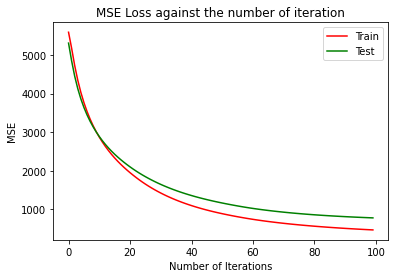

In [26]:
Line1=[k for i in mse_list for j in i for k in j]
plt.plot(np.arange(100),Line1,'red')
Line2=[k for i in mse_list4 for j in i for k in j]
plt.plot(np.arange(100),Line2,'green')
plt.xlabel("Number of Iterations")
plt.ylabel("MSE")
plt.legend(('Train','Test'))
plt.title("MSE Loss against the number of iteration")
plt.show()

# Ques 2: 5

In [27]:
#List of learning rate ranging from 0.001 to 1.0 to run model
learningrates_list=[0.001,0.005,0.01,0.05,0.1,0.5,1.0]

mse_list=[]
mse_list4=[[]]
w1_list=[]
w2_list=[]
b1_list=[]
b2_list=[]
rmse_train=[]
rmse_test=[]
rmse_train2=[]
rmse_test2=[]

for k in range(len(learningrates_list)):
  learning_rate=learningrates_list[k]
  for i in range (100):
    mse_list1=[]

    
    for j in range (100):
        #Forward feed
        z1=np.dot(w1,x[j].reshape(2,1))+b1
        a1=sigmoid(z1)
        z2=np.dot(w2,a1)+b2
        a2=linear(z2)
        a_round=np.round(a2,0)


        #Backpropagation
        dz2=a2-y[j].reshape(1,1)
        dw2=np.dot(dz2,a1.T)
        db2=dz2
        dz1=np.dot(w2.T,a2-y[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
        dw1=np.dot(dz1,x[j].reshape(2,1).T)
        db1=dz1

        # Update rule for the model
        w1=w1-learning_rate*dw1
        b1=b1-learning_rate*np.mean(db1)
        w2=w2-learning_rate*dw2
        b2=b2-learning_rate*np.mean(db2)
        
        #MSE claculation
        mse_ = ((y[j] - a2)**2)
        mse_list1.append(mse_)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)

    a=sum(mse_list1)/100
    mse_list.append(a)




# Test data
  mse_list4=[]

  for i in range (len (w1_list)):

      mse_list3=[]
      for j in range (50):
          z1=np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
          a1=sigmoid(z1)
          z2=np.dot(w2_list[i],a1)+b2_list[i]
          a2=linear(z2)
          a_round=np.round(a2,0)
          y[j]=np.round(y[j],0)
          

          mse= ((y_test[j]- a2)**2)
          mse_list3.append(mse)


      a=sum(mse_list3)/50
      mse_list4.append(a)



C:\Users\rafae\AppData\Local\Temp\ipykernel_22116\1549003694.py:13: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


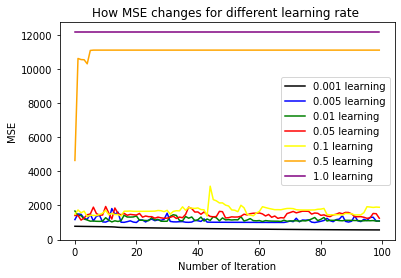

In [28]:
epoch=100
num_epoch = np.arange(epoch)

plt.plot(num_epoch, np.array(mse_list4[0:100]).reshape(epoch,1), color = 'black')
plt.plot(num_epoch, np.array(mse_list4[100:200]).reshape(epoch,1), color = 'blue')
plt.plot(num_epoch, np.array(mse_list4[200:300]).reshape(epoch,1), color = 'green')
plt.plot(num_epoch, np.array(mse_list4[300:400]).reshape(epoch,1), color = 'red')
plt.plot(num_epoch, np.array(mse_list4[400:500]).reshape(epoch,1), color = 'yellow')
plt.plot(num_epoch, np.array(mse_list4[500:600]).reshape(epoch,1), color = 'orange')
plt.plot(num_epoch, np.array(mse_list4[600:700]).reshape(epoch,1), color = 'purple')
plt.legend(("0.001 learning", "0.005 learning", "0.01 learning", "0.05 learning", "0.1 learning","0.5 learning", "1.0 learning"))
plt.ylabel('MSE')
plt.xlabel('Number of Iteration')
plt.title('How MSE changes for different learning rate ')
plt.show()

# Here, we can see that when learning rate decreases, error (loss) also decreases, in general. This happens because with fastr learning rate, it is easy to miss global minima.

# Ques 2.6

# Update rule does not need to be changed since here I will change just the number of neurons. Number of neurons is not part of update rule formula. Thus, it will not be chagned.

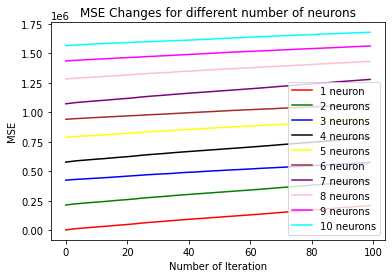

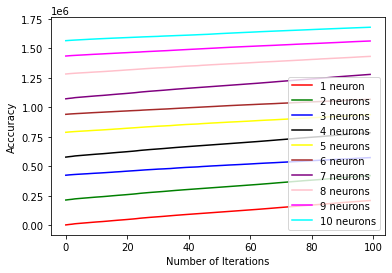

In [29]:
mse_list=[]
mse_list4=[]
w1_list=[]
w2_list=[]
b1_list=[]
b2_list=[]
mse_list1=[]
mse_list3=[]

#Since there might be 1-10 neurons, I set up a loop to run model with different number of neurons
for k in range(1,11):
  w1=np.random.rand(k,2)
  b1=np.random.rand(k,1)
  w2=np.random.rand(1,k)
  b2=np.random.rand(1,1)
  learning_rate=0.01
  
  for i in range (100):
      
      for j in range (100):
          #Running Forward feed
          z1=np.dot(w1,x[j].reshape(2,1))+b1
          a1=sigmoid(z1)
          z2=np.dot(w2,a1)+b2
          a2=linear(z2)


          #Backpropagation
          dz2=a2-y[j].reshape(1,1)
          dw2=np.dot(dz2,a1.T)
          db2=dz2
          dz1=np.dot(w2.T,a2-y[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
          dw1=np.dot(dz1,x[j].reshape(2,1).T)
          db1=dz1

          # Update rules for the model
          w1=w1-learning_rate*dw1
          b1=b1-learning_rate*np.mean(db1)
          w2=w2-learning_rate*dw2
          b2=b2-learning_rate*np.mean(db2)

          #MSE claculation as accuracy metric
          mse = ((y[j] - a2)**2)
          mse_list1.append(mse)

      w1_list.append(w1)
      w2_list.append(w2)
      b1_list.append(b1)
      b2_list.append(b2)

      a=sum(mse_list1)/100
      mse_list.append(a)

  





  # Test data
  for i in range (len (w1_list)):
      for j in range (50):
          z1=np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
          a1=sigmoid(z1)
          z2=np.dot(w2_list[i],a1)+b2_list[i]
          a2=linear(z2)

          mse= ((y_test[j]- a2)**2)
          mse_list3.append(mse)


      
      a=sum(mse_list3)/50
      mse_list4.append(a)

epoch=100
num_epoch = np.arange(epoch)
plt.plot(num_epoch, np.array(mse_list4[0:100]).reshape(epoch,1), color = 'red')
plt.plot(num_epoch, np.array(mse_list4[100:200]).reshape(epoch,1), color = 'green')
plt.plot(num_epoch, np.array(mse_list4[200:300]).reshape(epoch,1), color = 'blue')
plt.plot(num_epoch, np.array(mse_list4[300:400]).reshape(epoch,1), color = 'black')
plt.plot(num_epoch, np.array(mse_list4[400:500]).reshape(epoch,1), color = 'yellow')
plt.plot(num_epoch, np.array(mse_list4[500:600]).reshape(epoch,1), color = 'brown')
plt.plot(num_epoch, np.array(mse_list4[600:700]).reshape(epoch,1), color = 'purple')
plt.plot(num_epoch, np.array(mse_list4[700:800]).reshape(epoch,1), color = 'pink')
plt.plot(num_epoch, np.array(mse_list4[800:900]).reshape(epoch,1), color = 'magenta')
plt.plot(num_epoch, np.array(mse_list4[900:1000]).reshape(epoch,1), color = 'cyan')

plt.legend(("1 neuron", "2 neurons", "3 neurons","4 neurons", "5 neurons", "6 neuron", "7 neurons", "8 neurons","9 neurons", "10 neurons"))
plt.ylabel('MSE')
plt.xlabel('Number of Iteration')
plt.title('MSE Changes for different number of neurons')
plt.show()

L1=[k for i in mse_list4[0:100] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'red')
L1=[k for i in mse_list4[100:200] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'green')
L1=[k for i in mse_list4[200:300] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'blue')
L1=[k for i in mse_list4[300:400] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'black')
L1=[k for i in mse_list4[400:500] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'yellow')
L1=[k for i in mse_list4[500:600] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'brown')
L1=[k for i in mse_list4[600:700] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'purple')
L1=[k for i in mse_list4[700:800] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'pink')
L1=[k for i in mse_list4[800:900] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'magenta')
L1=[k for i in mse_list4[900:1000] for j in i for k in j]
plt.plot(np.arange(100),L1, color = 'cyan')
plt.legend(("1 neuron", "2 neurons", "3 neurons","4 neurons", "5 neurons", "6 neuron", "7 neurons", "8 neurons","9 neurons", "10 neurons"))
plt.xlabel("Number of Iterations")
plt.ylabel("Acccuracy")
plt.show()

# From the plot, it is clear that when I increases number of neurons, the loss has been decreased and accuracy has been increased.

# Ques 2: 7

# Yes, the update rule needs to be changed because diffenet activation function has different derivatives. When update the weights, this can influence weights, and ultimately total loss. As a result update should not be same.
# In equation for update rule, derivatives of activation function is taken and since the derivatives are different, so is update rules.

# Change that I made: I created activation function tanh and linear and apply them by changing the equations to ge toutput from 1st hidden layer. 

In [30]:
learning_rate=0.001

#Create the tanh function
def tanh (c):
    return (np.exp(c)-np.exp(-c))/(np.exp(c)+np.exp(-c))


mse_list=[]
w1_list=[]
w2_list=[]
b1_list=[]
b2_list=[]

#Trying 100 iterations
for i in range (100):
    mse_list1=[]
    t_list1=[]
    t_list2=[]
    a_list=[]
    
    for j in range (100):
        #Now we will Forward feed
        z1=np.dot(w1,x[j].reshape(2,1))+b1
        a1=tanh(z1)
        z2=np.dot(w2,a1)+b2
        a2=linear(z2)
        a_round=np.round(a_round,0)

        #Backprop
        dz2=a2.reshape(1,1)-y[j]
        dw2=(2)*np.dot(dz2,a1.T)
        db2=(2)*dz2
        dz1=np.dot(w2.T,a2-y[j].reshape(1,1))*(1-tanh(z1)**2)   #according to derivative of tanh function
        dw1=2*np.dot(dz1,x[j].reshape(2,1).T)
        db1=2*dz1

        #update rules for the network
        w1=w1-learning_rate*dw1
        b1=b1-learning_rate*db1
        w2=w2-learning_rate*dw2
        b2=b2-learning_rate*db2
        
        #MSE claculation
        mse_ = ((y[j] - a2)**2)
        mse_list1.append(mse_)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)
    a_list.append(a2)

    a=sum(mse_list1)/100
    mse_list.append(a)


print("Average MSE on Train data: ", sum(mse_list)/100)



#Test data
mse_list4=[]

for i in range (len (w1_list)):

    mse_list3=[]
    for j in range (50):
        z1=np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
        a1=tanh(z1)
        z2=np.dot(w2_list[i],a1)+b2_list[i]
        a2=linear(z2)
        y[j]=np.round(y[j],0)

        mse= ((y_test[j]- a2)**2)
        mse_list3.append(mse)


    a=sum(mse_list3)/50
    mse_list4.append(a)


print("Average MSE on Test data: ",sum(mse_list4)/100)

Average MSE on Train data:  [[361.79121288]]
Average MSE on Test data:  [[441.24130497]]


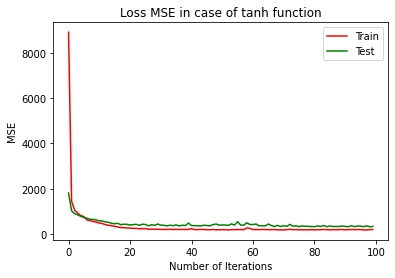

In [31]:
Line1=[k for i in mse_list for j in i for k in j]
plt.plot(np.arange(100),Line1,'red')
Line2=[k for i in mse_list4 for j in i for k in j]
plt.plot(np.arange(100),Line2,'green')
plt.xlabel("Number of Iterations")
plt.ylabel("MSE")
plt.legend(('Train','Test'))
plt.title('Loss MSE in case of tanh function')
plt.show()

# We can conclude that, using tanh instead of sigmoid, did not help to improve model noticably.

# Figure: predicted y and observed y

In [32]:
a_list

[array([[-72.52469527]])]

ValueError: x and y must have same first dimension, but have shapes (1, 1) and (50, 1)

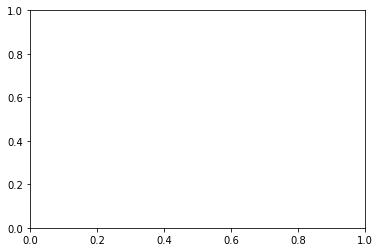

In [33]:
for i in a_list:
    plt.plot(i, y_test)

# Ques: 7

# Effect of activation function is it changes the output from layers typically by adding non-linearity. In this way, it help model to capture non-linearity.
# From the following analysis, it can be said that for this dataset, the following model improved accuracy when I used tanh, however, the model did not work in case of linaer activation function in hidden layer.

# Yes, since the activation function will be changed based on activation function since different activation function has different derivatives.

# Change that I made: I created activation function tanh and linear and apply them by changing the equations to ge toutput from 1st hidden layer. 

In [ ]:
#Using the linear function
def linear (x):
  return x


learning_rate=0.001

mse_list=[]
w1_list=[]
w2_list=[]
b1_list=[]
b2_list=[]
t11_list=[]

#Trying 100 iterations
for i in range (100):
    mse_list1=[]
    t_list1=[]
    t_list2=[]
    
    for j in range (100):
        # Now, we will do Forward feed
        z1=np.dot(w1,x[j].reshape(2,1))+b1   #here although there were 100 records, 1 record has been used at a time.  So, this reshaping was possible
        a1=linear(z1)
        z2=np.dot(w2,a1)+b2
        a2=linear(z2)
        a_round=np.round(a2,0)

        #Getting accuracy 
        if y[j]== a_round or a2:
            t_list1.append(1)
        else:
            t_list2.append(1)

        #Backpropogation
        dz2=a2-y[j].reshape(1,1)
        dw2=np.dot(dz2,a1.T)
        db2=dz2
        dz1=np.dot(w2.T,a2-y[j].reshape(1,1))*1  #according to  derivatives for linear function
        dw1=np.dot(dz1,x[j].reshape(2,1).T)
        db1=dz1

        #Update rule for the network
        w1=w1-learning_rate*dw1
        b1=b1-learning_rate*np.mean(db1)
        w2=w2-learning_rate*dw2
        b2=b2-learning_rate*np.mean(db2)
        
        #MSE claculation
        mse_ = ((y[j] - a2)**2)
        mse_list1.append(mse_)

    w1_list.append(w1)
    w2_list.append(w2)
    b1_list.append(b1)
    b2_list.append(b2)

    a=sum(mse_list1)/100
    mse_list.append(a)
    b=(len(t_list1))/100
    t11_list.append(b)


print("Avrg MSE loss on Train data for linear function: ", sum(mse_list)/2*100)


#Test data
mse_list4=[]
t33_list=[]

for i in range (len (w1_list)):
    t_list3=[]
    t_list4=[]
    mse_list3=[]

    #Since there are 50 records in test data
    for j in range (50):
        z1=np.dot(w1_list[i],x_test[j].reshape(2,1))+b1_list[i]
        a1=sigmoid(z1)
        z2=np.dot(w2_list[i],a1)+b2_list[i]
        a2=linear(z2)
        a_round=np.round(a2,0)
        y[j]=np.round(y[j],0)
        #Accuracy calcualtion
        if y[j]== a_round or a2:
            t_list3.append(1)
        else:
            t_list4.append(1)

        mse= ((y_test[j]- a2)**2)
        mse_list3.append(mse)

    a=sum(mse_list3)/50
    mse_list4.append(a)
    b=(len(t_list3))/50
    t33_list.append(b)


print("Avrg MSE Loss on Test data for linear function: ",sum(mse_list4)/2*50)

C:\Users\rafae\AppData\Local\Temp\ipykernel_4772\1298171523.py:50: RuntimeWarning: overflow encountered in square
  mse_ = ((y[j] - a2)**2)


Avrg MSE loss on Train data for linear function:  [[nan]]
Avrg MSE Loss on Test data for linear function:  [[nan]]


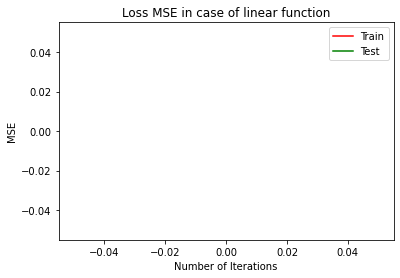

In [ ]:
Line1=[k for i in mse_list for j in i for k in j]
plt.plot(np.arange(100),Line1,'red')
Line2=[k for i in mse_list4 for j in i for k in j]
plt.plot(np.arange(100),Line2,'green')
plt.xlabel("Number of Iterations")
plt.ylabel("MSE")
plt.legend(('Train','Test'))
plt.title('Loss MSE in case of linear function')
plt.show()